In [284]:
import pandas as pd

house_data=pd.read_csv('/content/test.csv')
house_data

,web-scraper-order,web-scraper-start-url,page_links,page_links-href,price,room_type,lease_term,facilities,shopping,page_link3,page_link3-href,property_type,property_info,supermarket,page_link2,page_link2-href,price_1,room_type1,lease_term1,property_info1,facility1,shopping1,supermarket1,price2,room_type2,lease_term2,property_info2,facility2,shopping2,supermarket2
0,1605963214-219,https://www.stproperty.sg/search/rent/resident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blk 116 Bukit Merah View,https://www.stproperty.sg/listings/87161431/fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$999,Common,Flexible,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
1,1605963690-275,https://www.stproperty.sg/search/rent/resident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sturdee Residences,https://www.stproperty.sg/listings/87099471/fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$1,350",N.A,Flexible,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
2,1605964589-413,https://www.stproperty.sg/search/rent/resident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blk 659A Jurong West Street 65,https://www.stproperty.sg/listings/89389471/fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$850,Common,Flexible,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
3,1605964812-468,https://www.stproperty.sg/search/rent/resident...,Blk 443C Fernvale Road,https://www.stproperty.sg/listings/89291981/fo...,$700,N.A,40 sqm (Built-up),Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,NaN,NaN,HDB 4 Rooms,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1605965384-583,https://www.stproperty.sg/search/rent/resident...,Havelock Road,https://www.stproperty.sg/listings/89245891/fo...,"$2,500",N.A,450 sqft (Land) / \n\t\t\t\t\t\t\t\t450 sqft (...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,NaN,NaN,Semi-Detached,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1605964509-396,https://www.stproperty.sg/search/rent/resident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blk 50 Commonwealth 10,https://www.stproperty.sg/listings/88873691/fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$1,200",N.A,NaN,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
541,1605964346-356,https://www.stproperty.sg/search/rent/resident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lumiere,https://www.stproperty.sg/listings/89069601/fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$2,100",N.A,NaN,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
542,1605965337-563,https://www.stproperty.sg/search/rent/resident...,Blk 893B Woodlands Drive 50,https://www.stproperty.sg/listings/82113802/fo...,$800,Common,18 sqm (Built-up),Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,NaN,NaN,HDB Executive,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...,NaN,NaN

In [285]:
house_data2=pd.read_csv('/content/test3.csv')
house_data2

,web-scraper-order,web-scraper-start-url,page_links,page_links-href,price,room_type,lease_term,facilities,shopping,property_type,property_info,supermarket
0,1606014711-1099,https://www.stproperty.sg/search/rent/resident...,Tan Tong Meng Tower,https://www.stproperty.sg/listings/88490911/fo...,$850,Common,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Apartment,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
1,1606013826-889,https://www.stproperty.sg/search/rent/resident...,Blk 126C Kim Tian Road,https://www.stproperty.sg/listings/88847861/fo...,$850,Common,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,NaN,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,HDB 4 Rooms,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
2,1606014089-971,https://www.stproperty.sg/search/rent/resident...,Stirling Road,https://www.stproperty.sg/listings/83113922/fo...,"$1,330",Master,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Terrace,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
3,1606014121-979,https://www.stproperty.sg/search/rent/resident...,Bassein Court,https://www.stproperty.sg/listings/88766341/fo...,"$1,250",Common,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Apartment,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
4,1606014098-974,https://www.stproperty.sg/search/rent/resident...,TRE Residences,https://www.stproperty.sg/listings/89049941/fo...,"$1,200",N.A,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Condominium,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
...,...,...,...,...,...,...,...,...,...,...,...,...
269,1606014013-956,https://www.stproperty.sg/search/rent/resident...,De Royale,https://www.stproperty.sg/listings/88064881/fo...,"$1,200",Master,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Condominium,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
270,1606013845-897,https://www.stproperty.sg/search/rent/resident...,Blk 28 Balam Road,https://www.stproperty.sg/listings/89299431/fo...,$700,Common,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,HDB 5 Rooms,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
271,1606014901-1144,https://www.stproperty.sg/search/rent/resident...,Blk 114 Ang Mo Kio Avenue 4,https://www.stproperty.sg/listings/88480411/fo...,$800,Common,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,HDB 3 Rooms,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...
272,1606013946-936,https://www.stproperty.sg/search/rent/resident...,Blk 514 Choa Chu Kang Street 51,https://www.stproperty.sg/listings/88119121/fo...,$880,Common,Key Information\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\...,Facilities\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t...,Shopping Malls\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,HDB 5 Rooms,About this property\n\t\t\t\n\t\t\t\t\n\t\t\t\...,Groceries & Supermarts\n\t\t\t\t\t\t\t\n\t\t\t...


In [286]:
count=0
for j in range(house_data.shape[0]):
  if not pd.isnull(house_data.iloc[j]["page_links"]):
    count+=1 
print(count)

276


In [287]:
for j in range(house_data2.shape[0]):
  s=re.sub('\s','',house_data2.iloc[j]["lease_term"])
  house_data2.iloc[j]["lease_term"]=s[s.find("LeaseTerm")+9:s.find("LeaseTerm")+19]
print(house_data2['lease_term'].value_counts())
# house_data2['lease_term'].unique()

FlexibleFu    143
1yearFurni     90
1yearTakeO     20
FlexibleTa     14
2yearsFurn      6
2yearsTake      1
Name: lease_term, dtype: int64


In [288]:
count=0
for i in range(house_data.shape[0]):
  if pd.isnull(house_data.iloc[i]["page_links"]):
    # count+=1
    continue
  for j in range(house_data2.shape[0]):
    if house_data.iloc[i]["page_links-href"]==house_data2.iloc[j]["page_links-href"]:
      # s=re.sub('\s','',house_data2.iloc[j]["lease_term"])
      # m=s[s.find("LeaseTerm")+9:s.find("LeaseTerm")+19]
      house_data.iloc[i]["lease_term"]=house_data2.iloc[j]["lease_term"]
      count+=1
print(count)

143


In [289]:
count=0
count1=0
# print(len(house_data['lease_term']))
for i in range(house_data.shape[0]):
  # print(pd.isnull(house_data.iloc[i]["property_info"]))
  if not pd.isnull(house_data.iloc[i]["page_links"]):
    count1+=1
    if pd.isnull(house_data['lease_term'][i]):
      continue
    if 'sq' in house_data['lease_term'][i]:
      count+=1
house_data['lease_term'].value_counts()
# print(count1,count)

FlexibleFu             75
1yearFurni             48
150 sqft (Built-up)    10
200 sqft (Built-up)     8
14 sqm (Built-up)       8
                       ..
80 sqft (Built-up)      1
2yearsTake              1
135 sqft (Built-up)     1
23 sqm (Built-up)       1
686 sqft (Built-up)     1
Name: lease_term, Length: 79, dtype: int64

In [290]:
import re
import numpy as np
def get_p_type(s):
  if "PropertyType" in s:
    t=s[s.find("PropertyType")+12:s.find("PropertyType")+30]
  t=t.lower()
  if "hdb" in t:
    t="HDB"
  if "apartment" in t:
    t="apartment"
  if "condominium" in t:
    t="conda"
  if "terrace" in t:
    t="terrace"
  if "detached" in t:
    t="detached"
  return t
def get_model(s):
  m='unknown'
  if "Model" in s:
    m=s[s.find("Model")+5:s.find("Model")+15]
  return m
def get_size(s):
  n=0
  if "Size" in s:
    m=s[s.find("Size")+4:s.find("Size")+14]
    
    if "," in m:
      i=m.find(',')
      m=m[:i]+m[i+1:]
    
    n=float(re.findall(r"\d+\.?\d*",m)[0])
    
    if "sqft" in m:
      n=n*0.093
  return n
def get_year(s):
  n=0
  if "BuiltYear" in s:
    m=s[s.find("BuiltYear")+9:s.find("BuiltYear")+13]
    n=int(re.findall(r"\d+\.?\d*",m)[0])
  return n
def has_air(s):
  if "AirCondition" in s:
    return True
  else:
    return False
def get_super(s):
  m=0
  count=0
  while s.find("km")!=-1:
    count+=1
    if s=="-1km":
      return -1,0
    m=m+float(re.findall(r"\d+\.?\d*",s[s.find("km")-4:s.find("km")])[0])
    s=s[s.find("km")+2:]
  if m/count==0:
    print("count is 0")
  return m/count,count
# def get_lease(s):
#   s=re.sub('\s','',house_data2.iloc[10]["lease_term"])
#   m=s[s.find("LeaseTerm")+9:s.find("LeaseTerm")+19] 

In [291]:

p_type=[]
model=[]
size=[]
built_year=[]
has_airs=[]
avgs=[]
counts=[]
avgs1=[]
counts1=[]
prices=[]
for i in range(house_data.shape[0]):
  # print(pd.isnull(house_data.iloc[i]["property_info"]))
  if not pd.isnull(house_data.iloc[i]["property_info"]):
    p=house_data.iloc[i]["property_info"]
    f=house_data.iloc[i]["facilities"]
    su=house_data.iloc[i]["supermarket"]
    sh=house_data.iloc[i]["shopping"]
    pr=house_data.iloc[i]["price"]
    # lt=house_data.iloc[i]["lease_term"]
  elif not pd.isnull(house_data.iloc[i]["property_info1"]):
    p=house_data.iloc[i]["property_info1"]
    f=house_data.iloc[i]["facility1"]
    su=house_data.iloc[i]["supermarket1"]
    sh=house_data.iloc[i]["shopping1"]
    pr=house_data.iloc[i]["price_1"]
    # lt=house_data.iloc[i]["lease_term1"]
  else:
    p=house_data.iloc[i]["property_info2"]
    f=house_data.iloc[i]["facility2"]
    su=house_data.iloc[i]["supermarket2"]
    sh=house_data.iloc[i]["shopping2"]
    pr=house_data.iloc[i]["price2"]
    # lt=house_data.iloc[i]["lease_term2"]
  s=re.sub('\s','',p)
  if len(re.findall(r"\d+\.?\d*",pr))==0:
    pr=-1
  else:
    if "," in pr:
      i=pr.find(',')
      pr=pr[:i]+pr[i+1:]
    pr=re.findall(r"\d+\.?\d*",pr)[0]
   
  prices.append(int(pr))
  p_type.append(get_p_type(s))
  model.append(get_model(s))
  size.append(get_size(s))
  built_year.append(get_year(s))
  if pd.isnull(f):
    
    f="unknown"
  if pd.isnull(su):
    su="-1km"
  if pd.isnull(sh):
    sh="0km"
  # if pd.isnull(lt):
  #   lt="unknown"
  s1=re.sub('\s','',f)
  s2=re.sub('\s','',su)
  s3=re.sub('\s','',sh)
  # s4=re.sub('\s','',lt)
  has_airs.append(has_air(s1))
  avg,count=get_super(s2)
  avg1,count1=get_super(s3)
  counts.append(count)
  avgs.append(avg)
  counts1.append(count1)
  avgs1.append(avg1)
  # lts.append(get_lease_term(ls))
print(len(p_type),len(model),len(has_airs),len(prices),len(avgs1))
print(prices)

count is 0
count is 0
count is 0
count is 0
count is 0
count is 0
545 545 545 545 545
[999, 1350, 850, 700, 2500, 980, 1200, 3050, 1000, 799, 880, 850, 600, 850, 750, 900, 780, 900, 1850, 1250, 1350, 2100, 1100, 850, 600, 1400, 650, 900, 1200, 750, 1050, 880, 1200, 1000, 1000, 800, 750, 1550, 1050, 1200, 750, 650, 1250, 700, 950, 1100, 820, 700, 950, 700, 750, 4500, 550, 850, 700, 1288, 1300, 1150, 750, 1200, 900, 550, 950, 600, 700, 650, 1000, 1300, 1200, 950, 900, 1000, 1300, 580, 700, 850, 980, 1180, 700, 1330, 850, 300, 800, 1388, 900, 900, 1000, 650, 800, 1650, 1200, 1700, 1150, 880, 1200, 800, 700, 1200, 800, 1200, 1000, 650, 950, 800, 850, 850, 850, 580, 750, 800, 550, 600, 850, 750, 1350, 1850, 1200, 1250, 720, 1100, 1100, 1500, 1550, 1000, 1900, 950, 1600, 650, 1350, 850, 700, 2400, 700, 1500, 1330, 1200, 1450, 800, 1100, 1500, 900, 950, 880, 950, 800, 1000, 880, 1250, 1380, 750, 2340, 680, 998, 300, 1200, 1500, 1700, 750, 730, 900, 800, 650, 1400, 850, 850, 1000, 950, 680, 18

In [377]:
year_avg=sum(built_year)/len(built_year)
price_avg=(sum(prices)+2)/len(prices)

In [378]:
from pandas.core.frame import DataFrame
print(avg1)
dic={"price":prices,"p_type":p_type,"built_year":built_year,
     "has_airs":has_airs,"super_avg":avgs,"super_count":counts,
     "shop_avg":avgs1,"shop_count":counts1}
data=DataFrame(dic)
print(data.shape[0])

0.32
545


In [379]:
# print(data.loc[data['built_year'] == 0])
data.loc[data['price'] == -1,'price'] = price_avg
data.loc[data['built_year']==0,'built_year'] = year_avg
print(data.loc[data['built_year']==0])
print(data["p_type"].unique())

Empty DataFrame
Columns: [price, p_type, built_year, has_airs, super_avg, super_count, shop_avg, shop_count]
Index: []
['HDB' 'conda' 'detached' 'apartment' 'terrace']


In [380]:
years=pd.qcut(data["built_year"],2,labels=['old','new'])
data['yearGroup'] = years
data=data.join(pd.get_dummies(data.yearGroup))
data = data.drop(columns=['built_year','yearGroup'])


In [381]:
print(data.columns)

Index(['price', 'p_type', 'has_airs', 'super_avg', 'super_count', 'shop_avg',
       'shop_count', 'old', 'new'],
      dtype='object')


In [382]:
import numpy as np
array=np.array(data)
print(array[1])

[1350.0 'conda' True 0.5099999999999999 3 0.43333333333333335 3 0 1]


In [383]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("p_type", OneHotEncoder(), [1])], remainder = 'passthrough')
array = ct.fit_transform(array)


In [384]:
print(array[1])

[0.0 0.0 1.0 0.0 0.0 1350.0 True 0.5099999999999999 3 0.43333333333333335
 3 0 1]


In [385]:
labelencoder_X = LabelEncoder()
# print(array[:,7])
array[:,6] = labelencoder_X.fit_transform(array[:, 6])

In [386]:
print(array[1])

[0.0 0.0 1.0 0.0 0.0 1350.0 1 0.5099999999999999 3 0.43333333333333335 3 0
 1]


In [387]:
# def normalization(data):
#   _range = np.max(data) - np.min(data)
#   return (data - np.min(data)) / _range

# array[:,6]=normalization(array[:,6])
# array[:,8]=normalization(array[:,8])
# array[:,9]=normalization(array[:,9])
# array[:,10]=normalization(array[:,10])
# array[:,11]=normalization(array[:,11])
# from sklearn.preprocessing import scale
# array = scale(array)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
array = min_max_scaler.fit_transform(array)
print(array[1])

[0.         0.         1.         0.         0.         0.13449564
 1.         0.0983927  1.         0.05922551 1.         0.
 1.        ]


In [391]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

SSE = []
for i in range(2,10):
  model = KMeans(n_clusters=i,random_state=9)
  model.fit(array)  # 完成聚类
  pred_y = model.predict(array)  # 预测点在哪个聚类中
  SSE.append(model.inertia_)
  print(sm.silhouette_score(array, pred_y, sample_size=len(array), metric='euclidean'))
  # centers = model.cluster_centers_
  # print(centers)


0.3851763816633564
0.3931507469149068
0.46768264142650356
0.5615066046885432
0.6133828211886416
0.6512838665122884
0.6897942154521001
0.7232376478162588


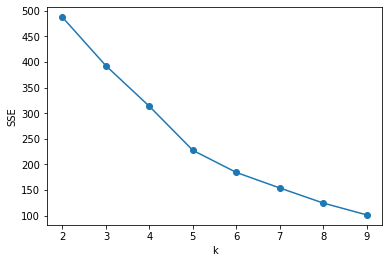

In [393]:
import matplotlib.pyplot as plt
X = range(2,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [402]:
model = KMeans(n_clusters=5,random_state=9)
model.fit(array)
centers = model.cluster_centers_

print(centers)

[[-4.99600361e-16  2.49800181e-16  1.00000000e+00 -8.32667268e-17
   1.52655666e-16  1.37054694e-01  8.93617021e-01  1.09735752e-01
   1.00000000e+00  1.18753938e-01  9.36170213e-01 -7.77156117e-16
   1.00000000e+00]
 [ 1.00000000e+00  6.66133815e-16 -3.60822483e-16  4.16333634e-17
   1.66533454e-16  6.35315328e-02  6.85314685e-01  1.16636187e-01
   1.00000000e+00  1.27874859e-01  9.47552448e-01  1.00000000e+00
   7.77156117e-16]
 [ 1.00000000e+00  3.33066907e-16 -3.33066907e-16 -8.32667268e-17
   1.52655666e-16  6.54895627e-02  7.22772277e-01  1.00878702e-01
   1.00000000e+00  1.10712916e-01  9.65346535e-01 -7.77156117e-16
   1.00000000e+00]
 [-4.99600361e-16  8.57142857e-01 -3.05311332e-16  2.59740260e-02
   1.16883117e-01  1.19407740e-01  9.09090909e-01  1.07884730e-01
   9.87012987e-01  1.08540662e-01  9.15584416e-01 -6.66133815e-16
   1.00000000e+00]
 [-5.55111512e-16  4.38461538e-01  2.00000000e-01  1.53846154e-01
   2.07692308e-01  1.21065236e-01  8.69230769e-01  1.17660229e-01


In [ ]:
# cluster1  conda+高价+new 
# cluster2  HDB+低价+无空调+old 
# cluster3  HDB+低价+shop多+new 
# cluster4  apartment+高价+new 
# cluster5  terrace,detached+高价+old  